In [1]:
# imports
%matplotlib inline
import seaborn as sns
from pyrt.data.data_trots import *
from pyrt.optimization.vmat import *
from pyrt.tools import print_structure_info
from pyrt.research.run_functions import *


In [2]:
# Josh Inputs - Prostate
# Find work directory
# cwd = '/Users/troy/Dropbox/CAP Group/TROTS/Prostate_VMAT/'
working_directory = 'outputs_josh/'
cwd = '/Users/jtmargo/Desktop/Josh/Clemson University/Research/Treatment Plan/TROTS Data/Prostate_VMAT/'

vmat_model_params = {
    'target_weights':{'PTV':1000., 'default':500.},
    'oar_weights':{'Rectum':10., 'Bladder':10., 'default':1.},
    'max_intensity':1000.,
    'min_intensity': 0.,
    'aper_limit': 1.
}


input_dict = {
    'cwd': cwd,
    'figure_directory':working_directory,
    'filename': None,
    'Rx': {'PTV': 79.56, 'PTV Vesicles': 72.2},
    'model_params':vmat_model_params
}



-------------------------------
|  Running All Cases in None  |
-------------------------------
---------------------------------------
|  Now Running Prostate_VMAT_206.mat  |
---------------------------------------
---------------------
|  Reading in data  |
---------------------
Building Structures
importing PTV Dij as dense matrix, converting to sparse...
importing PTV low Maximum Dij as dense matrix, converting to sparse...
importing PTV Shell 50 mm Dij as dense matrix, converting to sparse...
importing External Ring 20 mm Dij as sparse matrix
importing PTV Vesicles Dij as dense matrix, converting to sparse...
importing PTV Shell 5 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 15 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 25 mm Dij as dense matrix, converting to sparse...
importing Rectum Dij as dense matrix, converting to sparse...
importing Anus Dij as dense matrix, converting to sparse...
importing Hip (L) Dij as dense matrix, conve

importing PTV low Maximum Dij as dense matrix, converting to sparse...
importing PTV Shell 50 mm Dij as dense matrix, converting to sparse...
importing External Ring 20 mm Dij as sparse matrix
importing PTV Vesicles Dij as dense matrix, converting to sparse...
importing PTV Shell 5 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 15 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 25 mm Dij as dense matrix, converting to sparse...
importing Rectum Dij as dense matrix, converting to sparse...
importing Anus Dij as dense matrix, converting to sparse...
importing Hip (L) Dij as dense matrix, converting to sparse...
importing Hip (R) Dij as dense matrix, converting to sparse...
importing Bladder Dij as dense matrix, converting to sparse...
importing Patient Dij as dense matrix, converting to sparse...
Building CP
----------------------------
|  Data reading completed  |
----------------------------
---------------------------
|  Building Gurobi Model  

importing PTV Shell 5 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 15 mm Dij as dense matrix, converting to sparse...
importing PTV Shell 25 mm Dij as dense matrix, converting to sparse...
importing Rectum Dij as dense matrix, converting to sparse...
importing Anus Dij as dense matrix, converting to sparse...
importing Hip (L) Dij as dense matrix, converting to sparse...
importing Hip (R) Dij as dense matrix, converting to sparse...
importing Bladder Dij as dense matrix, converting to sparse...
importing Patient Dij as dense matrix, converting to sparse...
Building CP
----------------------------
|  Data reading completed  |
----------------------------
---------------------------
|  Building Gurobi Model  |
---------------------------
Initializing dose and aperture variables
Initializing objective variables
Creating constraints
Building dose constraint for PTV
Building dose constraint for PTV low Maximum
Building dose constraint for PTV Shell 50 mm
Building dose

Building dose constraint for PTV Shell 15 mm
Building dose constraint for PTV Shell 25 mm
Building dose constraint for Rectum
Building dose constraint for Anus
Building dose constraint for Hip (L)
Building dose constraint for Hip (R)
Building dose constraint for Bladder
Building dose constraint for Patient
Creating objective function
------------------------------
|  Gurobi Model Constructed  |
------------------------------
Optimize a model with 360861 rows, 237262 columns and 2069855 nonzeros
Variable types: 237239 continuous, 23 integer (23 binary)
Coefficient statistics:
  Matrix range     [2e-08, 1e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Found heuristic solution: objective 3.95254e+08
Presolve removed 345957 rows and 227303 columns
Presolve time: 1.65s
Presolved: 14904 rows, 9959 columns, 139104 nonzeros
Variable types: 9959 continuous, 0 integer (0 binary)

Root simplex log...

Iteration    Objective       Primal 

IndexError: index 124 is out of bounds for axis 0 with size 124

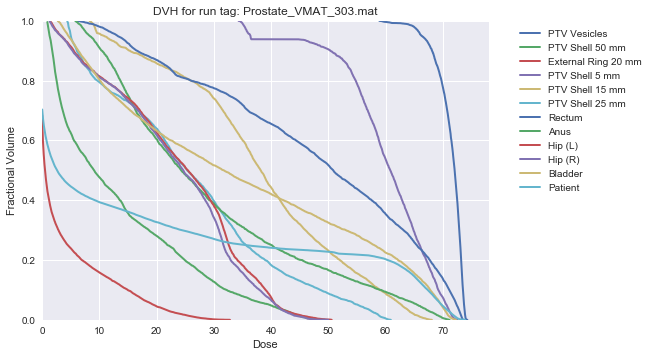

In [3]:
#Run all cases
case = 'Prostate_VMAT'
run_all(case,input_dict)

In [1]:
#Run individual case

# Load patient information
input_dict['filename'] = 'Prostate_VMAT_206.mat'

run_case(input_dict)



NameError: name 'input_dict' is not defined

In [ ]:
# Load patient information
input_dict['filename'] = 'Prostate_VMAT_206.mat'
model = vmat_mip(input_dict)

In [ ]:
debug

In [ ]:

field = np.asarray(data.f[b['Field'][1][0]])
test = int(np.where(field == np.asarray(model.data.f['patient/Beams/ElementIndex'][0][1]))[0])

In [ ]:
# # Josh Inputs - H&N
# # Find work directory
# # cwd = '/Users/troy/Dropbox/CAP Group/TROTS/Prostate_VMAT/'
# working_directory = 'outputs_josh/'
# cwd = '/Users/jtmargo/Desktop/Josh/Clemson University/Research/Treatment Plan/TROTS Data/Head-and-Neck/'


# # Load patient information
# filename = 'Prostate_VMAT_101.mat'

# imrt_model_params = {
#     'target_weights':{'PTV 0-46 Gy':1000., 'default':500.},
#     'oar_weights':{'Rectum':10., 'Bladder':10., 'default':1.},
#     'maxIntensity':1.,
#     'minIntensity': 0.
# }


# input_dict = {
#     'cwd': cwd,
#     'figure_directory':working_directory,
#     'filename': filename,
#     'Rx': {'PTV 0-46 Gy': 47.15},
#     'model_params':vmat_model_params
# }

In [ ]:
model = vmat_mip(input_dict)

In [ ]:
model.m.write('output.lp')

In [ ]:
model.optimize()

In [ ]:
model.plot_DVH(run_tag='default',saveDVH=True, num_bins = 500)

In [ ]:
for cp in range(model.data.num_control_points):
    for a in range(len(model.apertures_per_cp[cp])):
        print model.aper_intensity_var[cp][a].x

In [ ]:
model.run_title  = 'test_optimized'
model.optimize(display=5)

In [ ]:
model.plot_DVH(run_tag='test_optimized',saveDVH=True, num_bins = 500)

In [ ]:
hello_world()